# DAT210x - Programming with Python for DS

## Module5- Lab7

In [148]:
import random, math
import pandas as pd
import numpy as np
import scipy.io
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
from sklearn.neighbors import KNeighborsClassifier
matplotlib.style.use('ggplot') # Look Pretty


# Leave this alone until indicated:
Test_PCA = True

### A Convenience Function

This method is for your visualization convenience only. You aren't expected to know how to put this together yourself, although you should be able to follow the code by now:

In [3]:
def plotDecisionBoundary(model, X, y):
    print("Plotting...")

    fig = plt.figure()
    ax = fig.add_subplot(111)

    padding = 0.1
    resolution = 0.1

    #(2 for benign, 4 for malignant)
    colors = {2:'royalblue', 4:'lightsalmon'} 


    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Create a 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at at said location
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    plt.contourf(xx, yy, Z, cmap=plt.cm.seismic)
    plt.axis('tight')

    # Plot your testing points as well...
    for label in np.unique(y):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)

    p = model.get_params()
    plt.title('K = ' + str(p['n_neighbors']))
    plt.show()

### The Assignment

Load in the dataset, identify nans, and set proper headers. Be sure to verify the rows line up by looking at the file in a text editor.

In [149]:
# .. your code here ..
df=pd.read_csv('breast-cancer-wisconsin.data',header=None,names=['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status'],index_col=0)
df.head()
df.dtypes

thickness      int64
size           int64
shape          int64
adhesion       int64
epithelial     int64
nuclei        object
chromatin      int64
nucleoli       int64
mitoses        int64
status         int64
dtype: object

Copy out the status column into a slice, then drop it from the main dataframe. Always verify you properly executed the drop by double checking (printing out the resulting operating)! Many people forget to set the right axis here.

If you goofed up on loading the dataset and notice you have a `sample` column, this would be a good place to drop that too if you haven't already.

Nuclei column has some '?' values, replace the with NANs and fill it with mean values. Print unique values to confirm the process

In [150]:
df.nuclei = pd.to_numeric(df.nuclei, errors='coerce')
df = df.fillna(method = 'backfill', axis = 1)
df.nuclei.unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

In [151]:
status1=df['status'].copy()
df=df.drop(labels=['status'],axis=1)
status1.columns=['status']
status1=pd.DataFrame(status1)

In [152]:
status1['status'].unique()

array([2., 4.])

With the labels safely extracted from the dataset, replace any nan values with the mean feature / column value:

Do train_test_split. Use the same variable names as on the EdX platform in the reading material, but set the random_state=7 for reproducibility, and keep the test_size at 0.5 (50%).

In [153]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(df,status1,test_size=.5,random_state=7)

Experiment with the basic SKLearn preprocessing scalers. We know that the features consist of different units mixed in together, so it might be reasonable to assume feature scaling is necessary. Print out a description of the dataset, post transformation. Recall: when you do pre-processing, which portion of the dataset is your model trained upon? Also which portion(s) of your dataset actually get transformed?

In [154]:
#T = sp.StandardScaler()
#T = sp.MinMaxScaler()
T = sp.MaxAbsScaler()
#T =sp.Normalizer()

In [155]:
Xtrain=T.fit_transform(Xtrain)
#Xtrain=T1.tranform(Xtrain)
Xtest=T.transform(Xtest)

### Dimensionality Reduction

PCA and Isomap are your new best friends

In [156]:
model = None

if Test_PCA:
    print('Computing 2D Principle Components')
    # TODO: Implement PCA here. Save your model into the variable 'model'.
    # You should reduce down to two dimensions.
    
    # .. your code here ..
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2, svd_solver='full')
    pca.fit(Xtrain)
    PCA(copy=True, n_components=2, whiten=False)
    Xtrain = pca.transform(Xtrain)
    Xtest =pca.transform(Xtest)
    print(Xtrain.shape)
    
else:
    print('Computing 2D Isomap Manifold')
    # TODO: Implement Isomap here. Save your model into the variable 'model'
    # Experiment with K values from 5-10.
    # You should reduce down to two dimensions.

    # .. your code here ..
    from sklearn import manifold
    iso = manifold.Isomap(n_neighbors=5, n_components=2)
    iso.fit(Xtrain)
    manifold.Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_neighbors=5,neighbors_algorithm='auto', path_method='auto', tol=0)
    Xtrain = iso.transform(Xtrain)
    Xtest = iso.transform(Xtest)
    print(Xtrain.shape)

Computing 2D Principle Components
(349, 2)


Train your model against data_train, then transform both `data_train` and `data_test` using your model. You can save the results right back into the variables themselves.

In [157]:
ytrain=ytrain.iloc[:,0]
ytest=ytest.iloc[:,0]

In [158]:
scores=[]
scores1=list(scores)
neighbours=[]
Neighbours1=list(neighbours)

In [31]:
model = KNeighborsClassifier(n_neighbors=7,weights='distance')
#Train on XTrain and Ytrain
model.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

In [20]:
score=model.score(Xtest,ytest)

In [21]:
score

0.9571428571428572

In [159]:
for i in range(1,16):
 model = KNeighborsClassifier(n_neighbors=i)
 #Train on XTrain and Ytrain
 model.fit(Xtrain,ytrain)
 #Test on Xtest and Ytest
 score=model.score(Xtest,ytest)
 scores1.append(score)
 Neighbours1.append(i)

In [80]:
ScorebyNeighbour5=pd.DataFrame({'Neighbours': Neighbours1,'Scores': scores1})
ScorebyNeighbour5

,Neighbours,Scores
0,1,0.945714
1,2,0.937143
2,3,0.962857
3,4,0.951429
4,5,0.965714
5,6,0.965714
6,7,0.962857
7,8,0.962857
8,9,0.965714
9,10,0.960000


In [81]:
print("KNN with PCA and No scaling:\n")
print(ScorebyNeighbour5)

KNN with PCA and No scaling:

    Neighbours    Scores
0            1  0.945714
1            2  0.937143
2            3  0.962857
3            4  0.951429
4            5  0.965714
5            6  0.965714
6            7  0.962857
7            8  0.962857
8            9  0.965714
9           10  0.960000
10          11  0.965714
11          12  0.960000
12          13  0.960000
13          14  0.957143
14          15  0.960000


In [160]:
print("KNN with PCA and Maxabs:\n")
print(ScorebyNeighbour3)

KNN with PCA and Maxabs:

    Neighbours    Scores
0            1  0.945714
1            2  0.937143
2            3  0.962857
3            4  0.951429
4            5  0.965714
5            6  0.965714
6            7  0.962857
7            8  0.962857
8            9  0.965714
9           10  0.960000
10          11  0.965714
11          12  0.960000
12          13  0.960000
13          14  0.957143
14          15  0.960000


In [67]:
print("KNN with PCA and Normalizer:\n")
print(ScorebyNeighbour4)

KNN with PCA and Normalizer:

    Neighbours    Scores
0            1  0.851429
1            2  0.828571
2            3  0.857143
3            4  0.837143
4            5  0.840000
5            6  0.842857
6            7  0.857143
7            8  0.851429
8            9  0.857143
9           10  0.851429
10          11  0.851429
11          12  0.851429
12          13  0.857143
13          14  0.860000
14          15  0.865714


In [47]:
print("KNN with PCA and MinMax Scaler:\n")
print(ScorebyNeighbour2)

KNN with PCA and MinMax Scaler:

    Neighbours    Scores
0            1  0.951429
1            2  0.945714
2            3  0.954286
3            4  0.951429
4            5  0.957143
5            6  0.957143
6            7  0.957143
7            8  0.957143
8            9  0.957143
9           10  0.957143
10          11  0.957143
11          12  0.957143
12          13  0.957143
13          14  0.957143
14          15  0.957143


In [35]:
print("KNN with PCA and Standard Scaler:\n")
print(ScorebyNeighbour1)

KNN with PCA and Standard Scaler:

    Neighbours    Scores
0            1  0.945714
1            2  0.942857
2            3  0.954286
3            4  0.951429
4            5  0.957143
5            6  0.957143
6            7  0.957143
7            8  0.957143
8            9  0.957143
9           10  0.957143
10          11  0.957143
11          12  0.957143
12          13  0.957143
13          14  0.957143
14          15  0.957143


Implement and train `KNeighborsClassifier` on your projected 2D training data here. You can name your variable `knmodel`. You can use any `K` value from 1 - 15, so play around with it and see what results you can come up. Your goal is to find a good balance where you aren't too specific (low-K), nor are you too general (high-K). You should also experiment with how changing the weights parameter affects the results.

In [124]:
Results=pd.DataFrame(columns=['Neighbours', 'Score_standardscaler', 'Score_minmax', 'Score_maxabs', 'Score_normalizer','Score_noscaling'])

In [145]:
Results

,Neighbours,Score_standardscaler,Score_minmax,Score_maxabs,Score_normalizer,Score_noscaling
0,1,0.945714,0.951429,0.945714,0.851429,0.945714
1,2,0.942857,0.945714,0.937143,0.828571,0.937143
2,3,0.954286,0.954286,0.962857,0.857143,0.962857
3,4,0.951429,0.951429,0.951429,0.837143,0.951429
4,5,0.957143,0.957143,0.965714,0.840000,0.965714
5,6,0.957143,0.957143,0.965714,0.842857,0.965714
6,7,0.957143,0.957143,0.962857,0.857143,0.962857
7,8,0.957143,0.957143,0.962857,0.851429,0.962857
8,9,0.957143,0.957143,0.965714,0.857143,0.965714
9,10,0.957143,0.957143,0.960000,0.851429,0.960000


Be sure to always keep the domain of the problem in mind! It's WAY more important to errantly classify a benign tumor as malignant, and have it removed, than to incorrectly leave a malignant tumor, believing it to be benign, and then having the patient progress in cancer. Since the UDF weights don't give you any class information, the only way to introduce this data into SKLearn's KNN Classifier is by "baking" it into your data. For example, randomly reducing the ratio of benign samples compared to malignant samples from the training set.

Calculate and display the accuracy of the testing set:

Plotting...


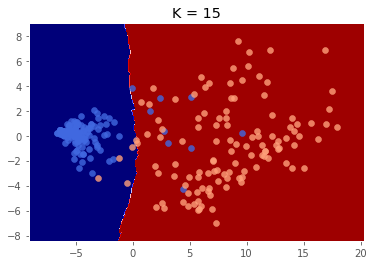

In [147]:
plotDecisionBoundary(model, Xtest, ytest)